In [1]:
import pandas as pd

In [2]:
index = pd.DatetimeIndex(['2020-12-25', '2020-12-26',
                         '2020-12-27', '2020-12-28'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-12-25    0
2020-12-26    1
2020-12-27    2
2020-12-28    3
dtype: int64

In [3]:
data['2020-12-25':'2020-12-27']

2020-12-25    0
2020-12-26    1
2020-12-27    2
dtype: int64

In [4]:
data['2020']

2020-12-25    0
2020-12-26    1
2020-12-27    2
2020-12-28    3
dtype: int64

In [7]:
from datetime import datetime

dates = pd.to_datetime([datetime(2020, 12, 25), '26th of December, 2020',
                       '2021-Jan-1', '03-02-2020', '20200301'])
dates

DatetimeIndex(['2020-12-25', '2020-12-26', '2021-01-01', '2020-03-02',
               '2020-03-01'],
              dtype='datetime64[ns]', freq=None)

In [8]:
dates.to_period('D')

PeriodIndex(['2020-12-25', '2020-12-26', '2021-01-01', '2020-03-02',
             '2020-03-01'],
            dtype='period[D]', freq='D')

In [9]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '7 days', '-298 days', '-299 days'], dtype='timedelta64[ns]', freq=None)

In [10]:
pd.date_range('2020-12-25', '2021-01-01')

DatetimeIndex(['2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pd.date_range('2020-12-25', periods=8)

DatetimeIndex(['2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range('2020-12-25', periods=8, freq='H')

DatetimeIndex(['2020-12-25 00:00:00', '2020-12-25 01:00:00',
               '2020-12-25 02:00:00', '2020-12-25 03:00:00',
               '2020-12-25 04:00:00', '2020-12-25 05:00:00',
               '2020-12-25 06:00:00', '2020-12-25 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [13]:
pd.period_range('2020-12', periods=8, freq='M')

PeriodIndex(['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
             '2021-06', '2021-07'],
            dtype='period[M]', freq='M')

In [14]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [15]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [16]:
from pandas.tseries.offsets import BDay
pd.date_range('2020-12-25', periods=7, freq=BDay())

DatetimeIndex(['2020-12-25', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01', '2021-01-04'],
              dtype='datetime64[ns]', freq='B')

In [18]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2020',
                      data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [19]:
goog = goog['Close']

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

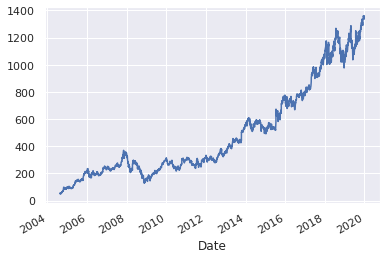

In [21]:
goog.plot()

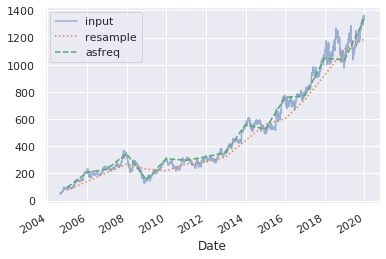

In [22]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
          loc='upper left');

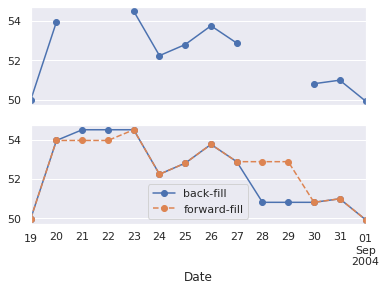

In [25]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill'])

/home/arti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  import sys


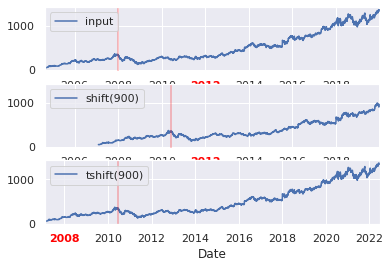

In [30]:
fig, ax = plt.subplots(3, sharey=True)

goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2007-12-25')
offset = pd.Timedelta(900,'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

/home/arti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


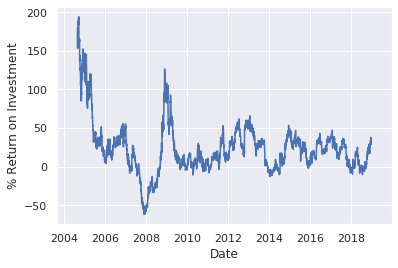

In [31]:
ROI = 100 * (goog.tshift(-365) / goog -1)
ROI.plot()
plt.ylabel('% Return on Investment');

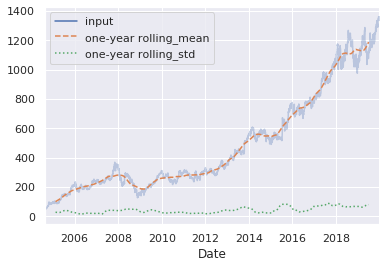

In [33]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [34]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [37]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [38]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,137777.000000,137777.000000,137777.000000
mean,112.490771,51.267004,61.223767
std,143.132406,65.992109,89.076846
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


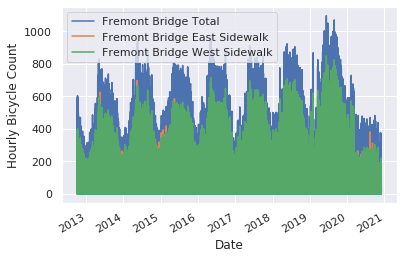

In [41]:
%matplotlib inline
import seaborn; seaborn.set()

data.plot()
plt.ylabel('Hourly Bicycle Count');

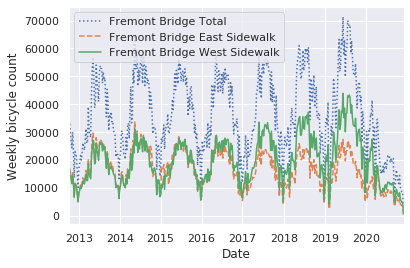

In [42]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

Text(0, 0.5, 'mean daily count')

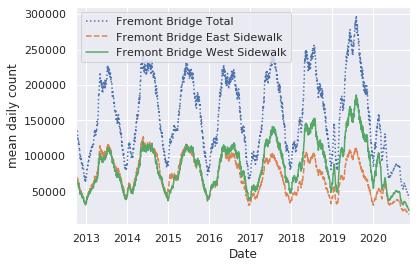

In [43]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean daily count')

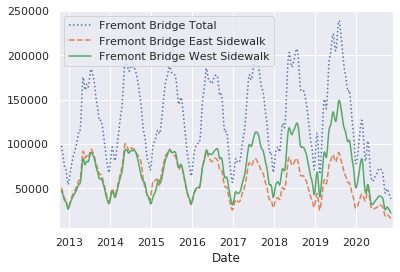

In [45]:
daily.rolling(50, center=True,
            win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

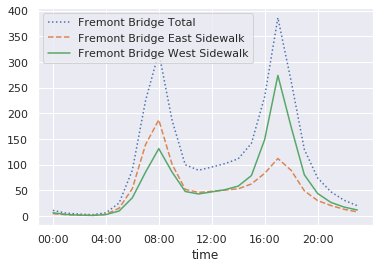

In [50]:
import numpy as np

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

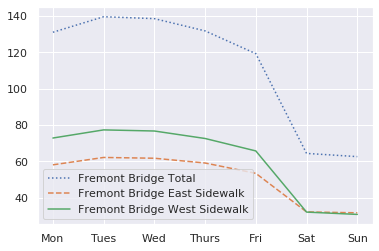

In [51]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [52]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

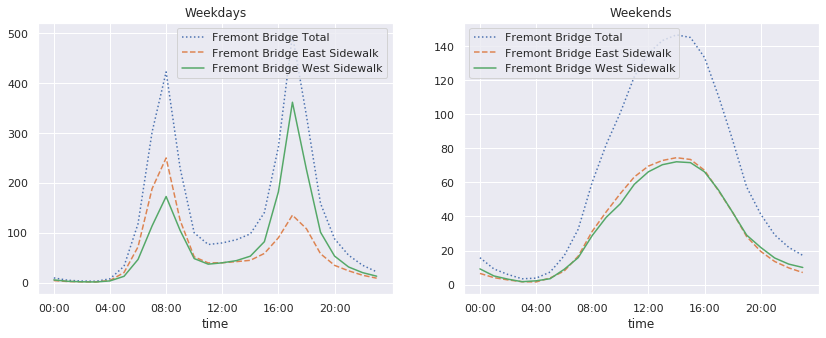

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks=hourly_ticks, style=[':', '--', '-'])